<a href="https://colab.research.google.com/github/newcupcake/newcupnoodles/blob/master/WHR2019_correration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#必要なライブラリのインポート
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt                   #グラフを描く
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # データセット
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #クラスタリング用
from sklearn.mixture import GaussianMixture # GMM clustering

import os                     # OSオペレーション
import sys                    # データサイズ


In [0]:
wh = pd.read_csv("2019.csv") #データセット読み込み
wh.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [0]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

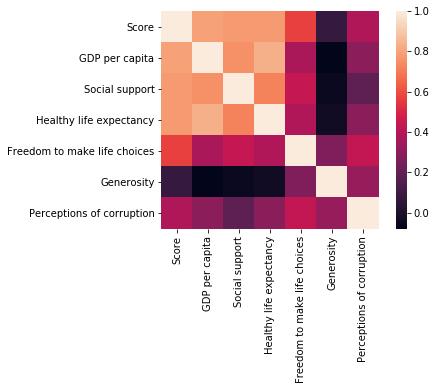

In [0]:
wh1 = wh[['Score','GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 
          'Generosity','Perceptions of corruption']] 
cor = wh1.corr() #相関関係
sns.heatmap(cor, square = True) # heat mapを描く

In [0]:
#データの整理と標準化
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 2.12871112,  1.09504166,  1.26809758, ...,  1.4242823 ,
        -0.33540398,  2.99675712],
       [ 1.97639663,  1.20332385,  1.22115409, ...,  1.39627687,
         0.70726491,  3.17715844],
       [ 1.93493825,  1.46773387,  1.25133205, ...,  1.47329179,
         0.90737308,  2.4449413 ],
       ...,
       [-1.98648391, -1.39796708, -2.31972634, ..., -2.74852598,
        -0.28274393, -0.90840093],
       [-2.09463621, -2.21386084, -4.05328238, ..., -1.17322084,
         0.52822076, -0.8022825 ],
       [-2.30192812, -1.50876747, -2.12524617, ..., -2.67851242,
         0.18066446, -0.20801932]])

In [0]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

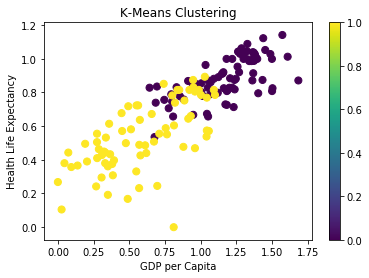

In [0]:
# k means　GDPと健康寿命
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['GDP per capita'],wh1['Healthy life expectancy'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health Life Expectancy')
plt.colorbar(scatter)

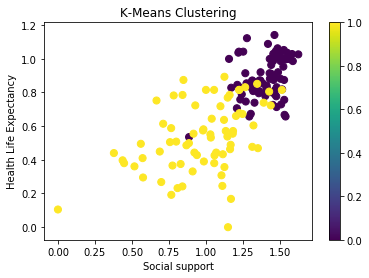

In [0]:
#k means　家族と健康寿命
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Social support'],wh1['Healthy life expectancy'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Social support')
ax.set_ylabel('Health Life Expectancy')
plt.colorbar(scatter)

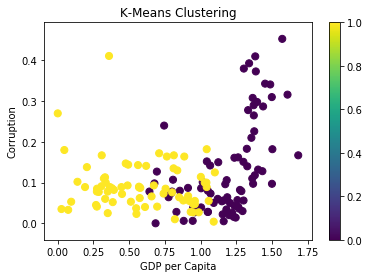

In [0]:
# k means　GDPと汚職の無さ
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['GDP per capita'],wh1['Perceptions of corruption'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

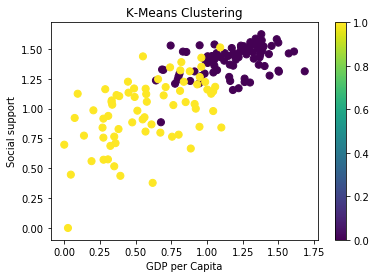

In [0]:
#Kmeans GDPと家族
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['GDP per capita'],wh1['Social support'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Social support')
plt.colorbar(scatter)

0    26
1    35
2    22
3    27
4    12
5    34
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

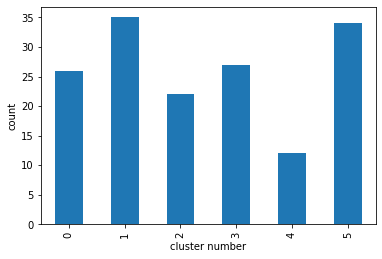

In [0]:
#　Kmeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

#クラスターの重心を計算
kmeans.fit(wh1)

#クラスター番号をPandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

#クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')